Packages import

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

Data import

In [10]:
data = pd.read_pickle("../Data/data_no_na.pkl")
data2022 = data[data["annee"] == 2022]
data2017 = data[data["annee"] == 2017]

Nodewise Regressor

In [4]:
from sklearn.linear_model import LassoCV

class NodewiseReg():
    
    def __init__(self, rule='AND', eps=1e-8):
        '''
        Parameters:
        
        rule: {"OR", "AND"}
        
        Attributes:
        
        graph_structure_ : numpy.ndarray, shape (n_features, n_features)
            Estimated adjacancy matrix.        
        '''
        self.graph_structure_ = None
        self.rule = rule
        self.eps = eps
        
    def fit(self, X):
        """ Fit the model to X.
        
        Parameters:
        -----------
        X: (n, p) np.array
            Data matrix
        
        Returns:
        -----
        self
        """         
        #TODO
        n,p = X.shape
        self.lambd=np.zeros((p,p))
        for j in range(p):
            model = LassoCV(
                eps=self.eps,
                verbose=False
            )
            cols_minus_j=[i for i in range(p) if i!=j]
            X_minus_j=X[:,cols_minus_j]
            Y_j = X[:,j]
            model.fit(X_minus_j, Y_j)
            self.lambd[cols_minus_j,j]=model.coef_
        if self.rule=="OR":
            self.edges = (np.abs(self.lambd) + np.abs(self.lambd.T) > 0).astype(int)
        elif self.rule=="AND":
            self.edges = ((np.abs(self.lambd)>0) & (np.abs(self.lambd.T) > 0)).astype(int)
        return self


Nodewise regression on 2022 data

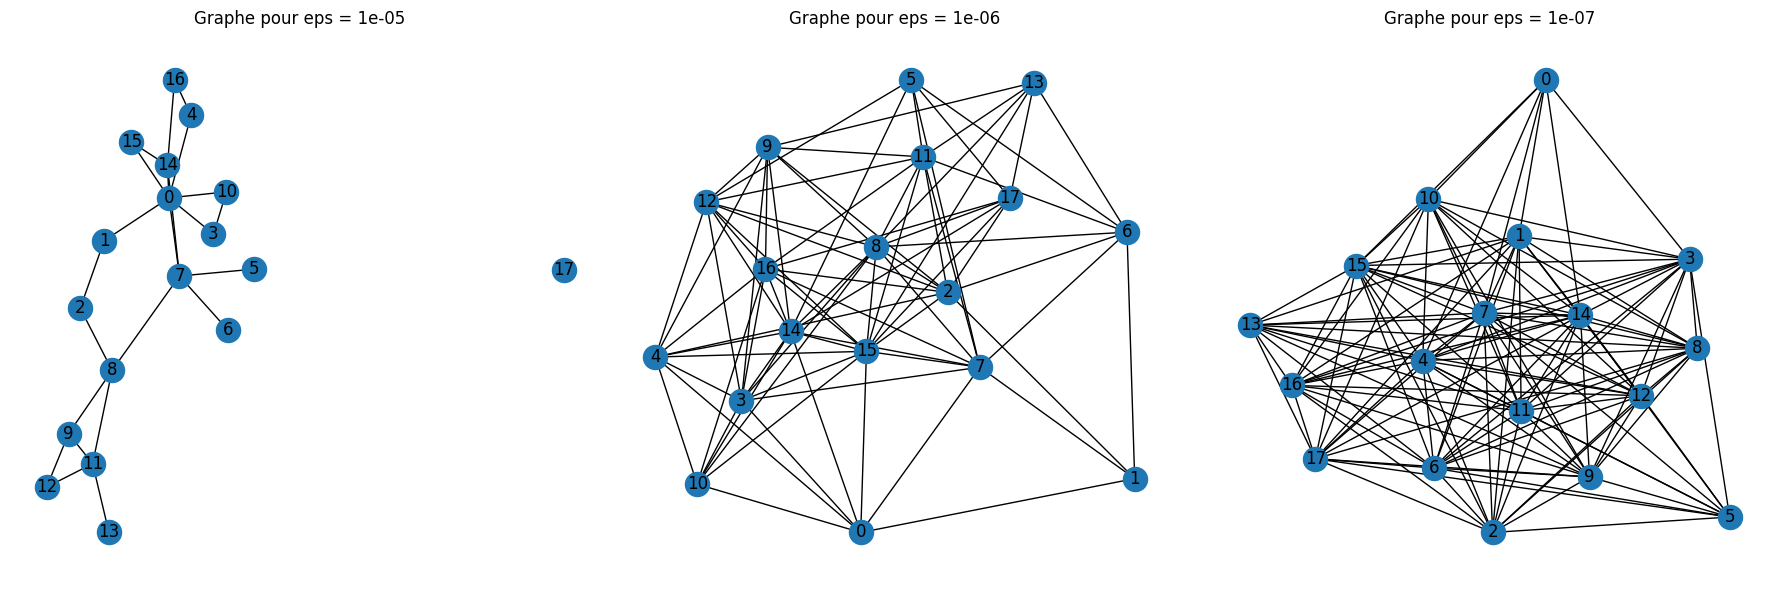

                                        0
0                             codecommune
1                     pvotepreviouspvoteD
2                             pvotepvoteD
3                         popcommunes/pop
4                    popcommunesvbbm/vbbm
5                  agesexcommunes/prop014
6                  agesexcommunes/prop60p
7                   agesexcommunes/perage
8                   diplomescommunes/pbac
9                   diplomescommunes/psup
10                 diplomescommunes/nodip
11                      cspcommunes/pouvr
12                      cspcommunes/pcadr
13                      cspcommunes/pchom
14                   revcommunes/revratio
15                     rsacommunes/perrsa
16  capitalimmobiliercommunes/prixm2ratio
17                  naticommunes/pimmigre


In [13]:
X = data2022.values[:,1:]
eps_values = [1e-5, 1e-6, 1e-7]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, eps in zip(axes, eps_values):
    model = NodewiseReg(eps=eps).fit(X)
    edges = model.edges
    G = nx.from_numpy_array(edges)

    nx.draw(G, with_labels=True, ax=ax)
    ax.set_title(f"Graphe pour eps = {eps}")

plt.tight_layout()
plt.show()

header = data2022.columns
print(pd.DataFrame(list(header[1:])))

On 2017 data

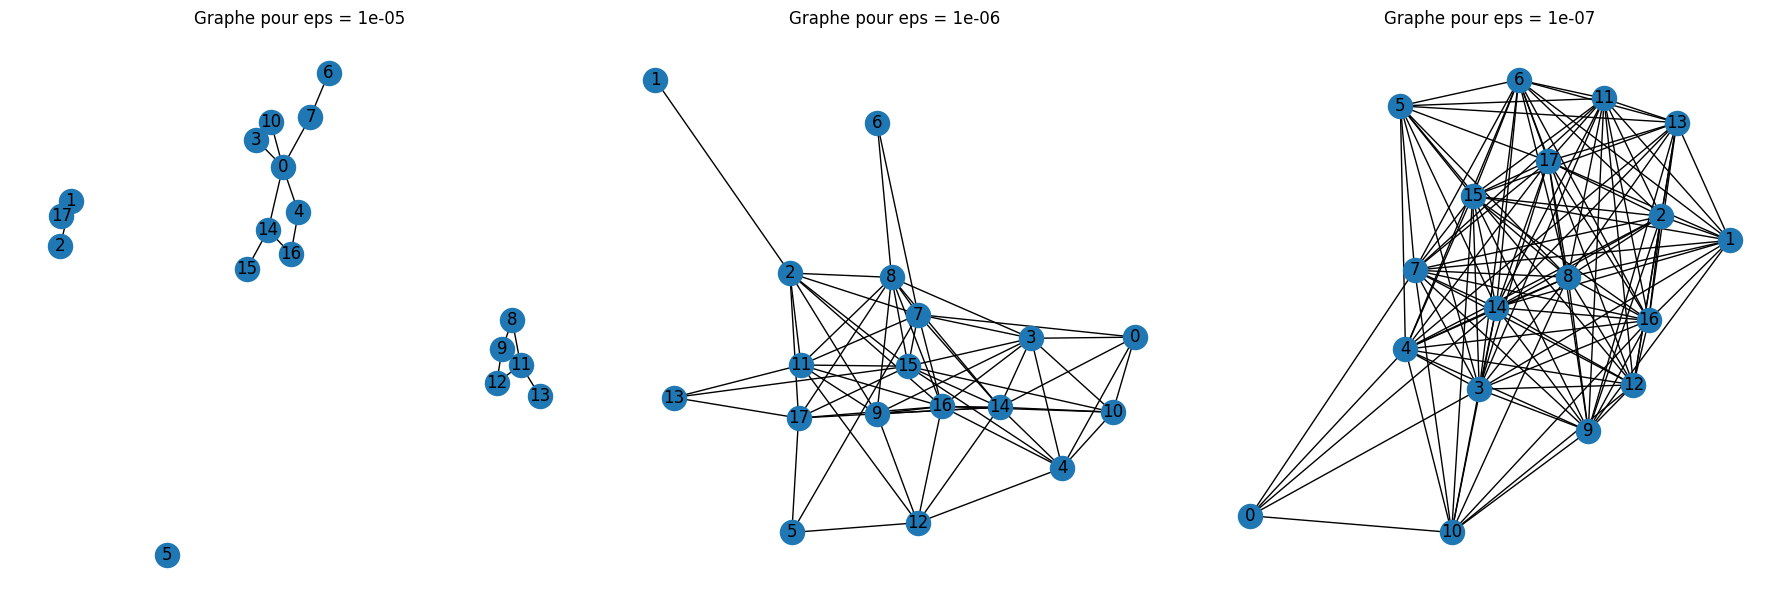

                                        0
0                             codecommune
1                     pvotepreviouspvoteD
2                             pvotepvoteD
3                         popcommunes/pop
4                    popcommunesvbbm/vbbm
5                  agesexcommunes/prop014
6                  agesexcommunes/prop60p
7                   agesexcommunes/perage
8                   diplomescommunes/pbac
9                   diplomescommunes/psup
10                 diplomescommunes/nodip
11                      cspcommunes/pouvr
12                      cspcommunes/pcadr
13                      cspcommunes/pchom
14                   revcommunes/revratio
15                     rsacommunes/perrsa
16  capitalimmobiliercommunes/prixm2ratio
17                  naticommunes/pimmigre


In [12]:
X = data2017.values[:,1:]
eps_values = [1e-5, 1e-6, 1e-7]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, eps in zip(axes, eps_values):
    model = NodewiseReg(eps=eps).fit(X)
    edges = model.edges
    G = nx.from_numpy_array(edges)

    nx.draw(G, with_labels=True, ax=ax)
    ax.set_title(f"Graphe pour eps = {eps}")

plt.tight_layout()
plt.show()

header = data2022.columns
print(pd.DataFrame(list(header[1:])))